In [1]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.6/458.6 kB 35.8 MB/s eta 0:00:00


In [2]:
#Importing all required library
import nltk
import re
import string
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D

In [3]:
#Downloading nltk StopWords and Wordnet 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Dataset1
1. Importing 1st dataset
2. EDA on 1st dataset
3. Data pre-processing

In [4]:
Dataset1 = pd.read_csv(r"news.csv")

In [5]:
Dataset1.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [6]:
Dataset1.tail()

Unnamed: 0                                              title  \
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
6330  The State Department told the Republican Natio...  REAL  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE  
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL

In [7]:
Dataset1.nunique()

Unnamed: 0    6335
title         6256
text          6060
label            2
dtype: int64

In [8]:
Dataset1["Article"] = Dataset1["title"] + Dataset1["text"]
Dataset1.sample(frac = 1) #Shuffle 100%

Dataset1.label[Dataset1.label == 'REAL'] = 1
Dataset1.label[Dataset1.label == 'FAKE'] = 0

Dataset1 = Dataset1.loc[:,['Article','label']]
Dataset1 = Dataset1.dropna()

/tmp/ipykernel_32/3616711757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'REAL'] = 1
/tmp/ipykernel_32/3616711757.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'FAKE'] = 0


In this step we will clean the data that will be used for training. The cleaning will involve these steps-
1.Removing all the extra information like brackets, any kind of puctuations - commas, apostrophes, quotes, question marks, and more.
2.Remove all the numeric text, urls

In [9]:
def wordpre(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [10]:
##  Applying the wordpre method to the dataset
Dataset1['Article']=Dataset1['Article'].apply(wordpre)

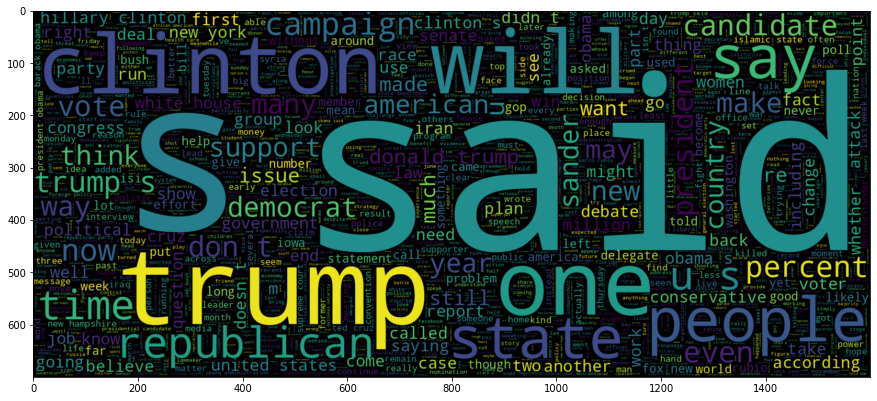

In [11]:
#word used in Real news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

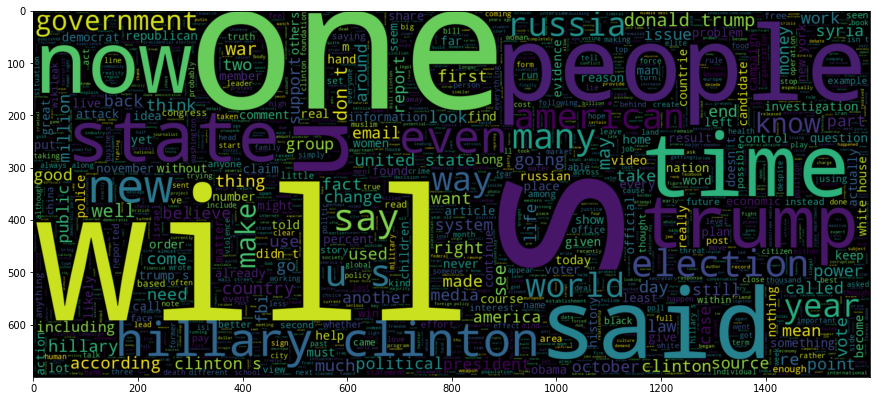

In [12]:
#word used in Fake news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 2

In [13]:
Dataset2_real = pd.read_csv(r"politifact_real.csv")
Dataset2_fake = pd.read_csv(r"politifact_fake.csv")

In [14]:
Dataset2_real['label']= 1
Dataset2_fake['label']= 0
Dataset2 = pd.concat([Dataset2_real, Dataset2_fake])
Dataset2["Article"] = Dataset2["title"]
Dataset2.sample(frac = 1) #Shuffle 100%
Dataset2 = Dataset2.loc[:,['Article','label']]

In [15]:
Dataset2

Article  label
0          National Federation of Independent Business      1
1                          comments in Fayetteville NC      1
2    Romney makes pitch, hoping to close deal : Ele...      1
3    Democratic Leaders Say House Democrats Are Uni...      1
4      Budget of the United States Government, FY 2008      1
..                                                 ...    ...
427        Who is affected by the government shutdown?      0
428  Lindsey Graham Threatens To Convert To Democra...      0
429  ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...      0
430  Sarah Palin Calls To Boycott Mall Of America B...      0
431                                  Account Suspended      0

[1056 rows x 2 columns]

In [16]:
##  Applying the wordpre method to the dataset
Dataset2['Article']=Dataset2['Article'].apply(wordpre)

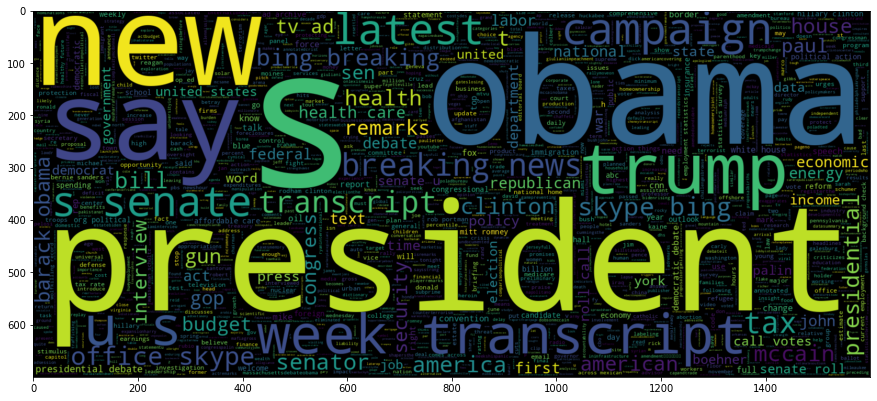

In [17]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

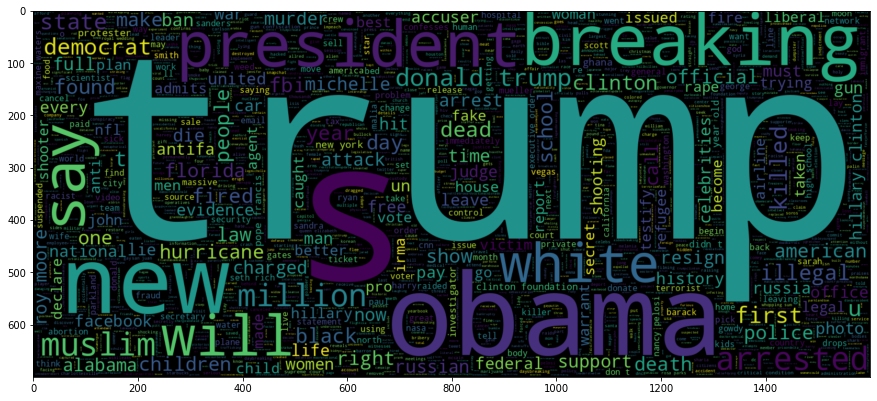

In [18]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 3

In [19]:
Dataset3 = pd.read_csv(r"train.csv")

In [20]:
Dataset3.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [21]:
Dataset3["Article"] = Dataset3["title"] + Dataset3["text"]
Dataset3["label"] = Dataset3["label"]
Dataset3.sample(frac = 1) #Shuffle 100%

Dataset3 = Dataset3.loc[:,['Article','label']]
Dataset3 = Dataset3.dropna()

In [22]:
##  Applying the wordpre method to the dataset
Dataset3['Article']=Dataset3['Article'].apply(wordpre)

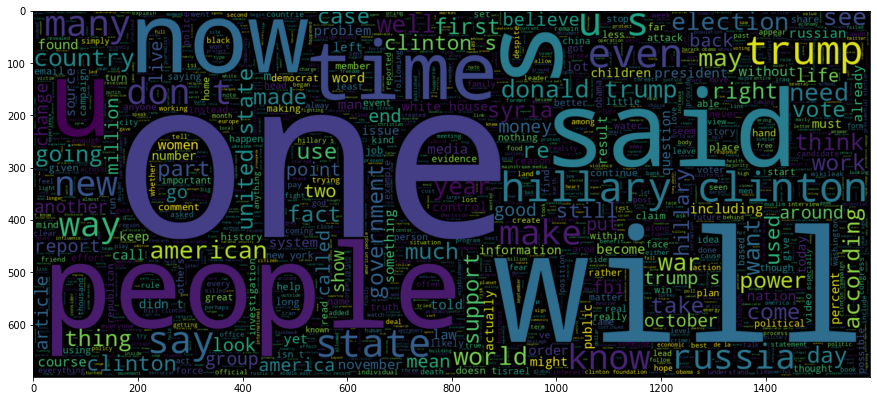

In [23]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

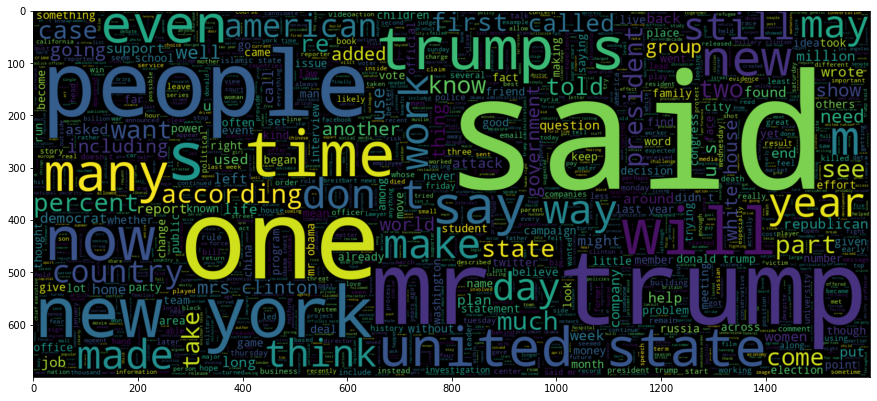

In [24]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 4

In [25]:
Dataset4_true = pd.read_csv(r"True.csv")
Dataset4_fake = pd.read_csv(r"Fake.csv")

In [26]:
Dataset4_true['label']= 1
Dataset4_fake['label']= 0
Dataset4 = pd.concat([Dataset4_true, Dataset4_fake])
Dataset4["Article"] = Dataset4["title"] + Dataset4["text"]
Dataset4.sample(frac = 1) #Shuffle 100%
Dataset4 = Dataset4.loc[:,['Article','label']]

In [27]:
##  Applying the wordpre method to the dataset
Dataset4['Article']=Dataset4['Article'].apply(wordpre)
Dataset4

Article  label
0      as u s  budget fight looms  republicans flip t...      1
1      u s  military to accept transgender recruits o...      1
2      senior u s  republican senator   let mr  muell...      1
3      fbi russia probe helped by australian diplomat...      1
4      trump wants postal service to charge  much mor...      1
...                                                  ...    ...
23476  mcpain  john mccain furious that iran treated ...      0
23477  justice  yahoo settles e mail privacy class ac...      0
23478  sunnistan  us and allied  safe zone  plan to t...      0
23479  how to blow   million  al jazeera america fina...      0
23480   u s  navy sailors held by iranian military   ...      0

[44898 rows x 2 columns]

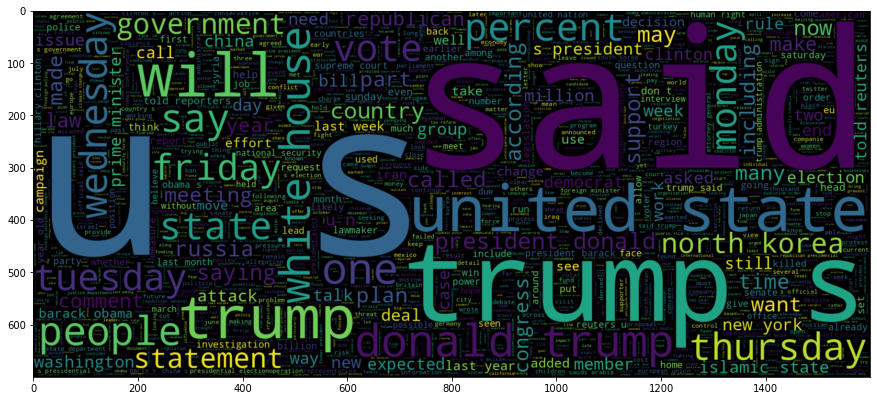

In [28]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset4[Dataset4.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

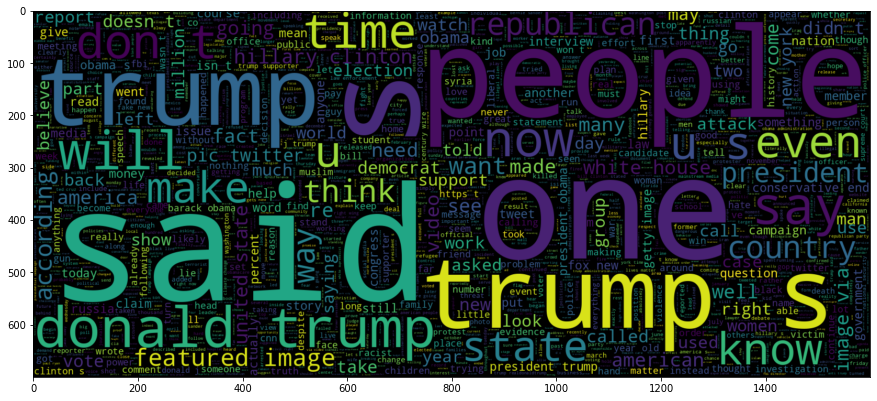

In [29]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset4[Dataset4.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 5

In [30]:
Dataset5 = pd.read_csv("data.csv")

In [31]:
Dataset5.head()

URLs  \
0  http://www.bbc.com/news/world-us-canada-414191...   
1  https://www.reuters.com/article/us-filmfestiva...   
2  https://www.nytimes.com/2017/10/09/us/politics...   
3  https://www.reuters.com/article/us-mexico-oil-...   
4  http://www.cnn.com/videos/cnnmoney/2017/10/08/...   

                                            Headline  \
0         Four ways Bob Corker skewered Donald Trump   
1  Linklater's war veteran comedy speaks to moder...   
2  Trump’s Fight With Corker Jeopardizes His Legi...   
3  Egypt's Cheiron wins tie-up with Pemex for Mex...   
4        Jason Aldean opens 'SNL' with Vegas tribute   

                                                Body  Label  
0  Image copyright Getty Images\nOn Sunday mornin...      1  
1  LONDON (Reuters) - “Last Flag Flying”, a comed...      1  
2  The feud broke into public view last week when...      1  
3  MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1  
4  Country singer Jason Aldean, who was performin...      1

In [32]:
Dataset5["Article"] = Dataset5["Headline"] + Dataset5["Body"]
Dataset5["label"] = Dataset5["Label"]
Dataset5.sample(frac = 1) #Shuffle 100%
Dataset5 = Dataset5.loc[:,['Article','label']]
Dataset5 = Dataset5.dropna()

In [33]:
##  Applying the wordpre method to the dataset
Dataset5['Article']=Dataset5['Article'].apply(wordpre)

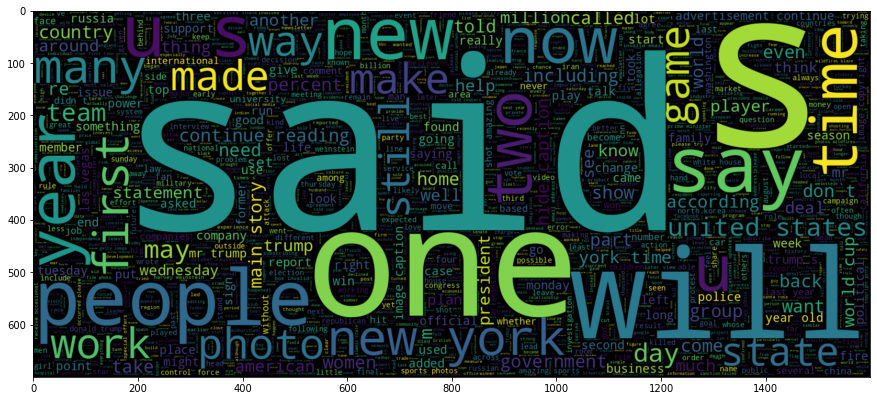

In [34]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset5[Dataset5.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

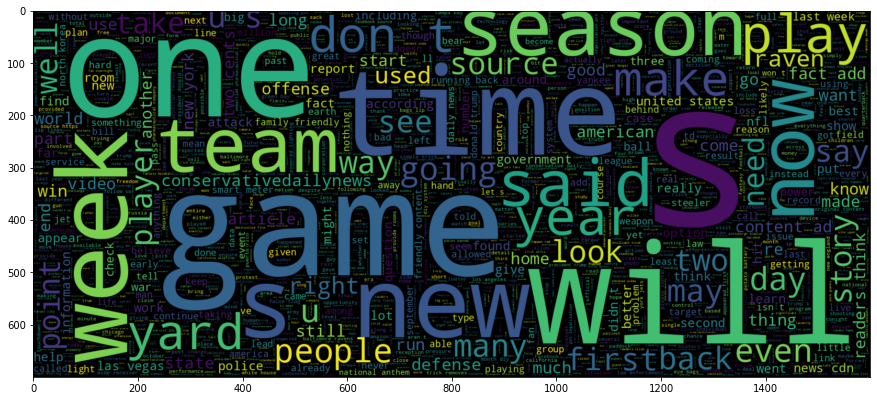

In [35]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset5[Dataset5.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

In [36]:
#combining all the datset into one
frames = [Dataset1, Dataset2, Dataset3, Dataset4, Dataset5]
Dataset = pd.concat(frames)

In [37]:
Dataset.shape

(76480, 2)

In [38]:
#Vectorization using Word2Vec
!pip install gensim

import gensim
y = Dataset['label'].values
x = [d.split() for d in Dataset['Article'].tolist()]
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences = x, vector_size = DIM, window = 10, min_count = 1)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 45.2 MB/s eta 0:00:0000:0100:01


In [39]:
#Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)


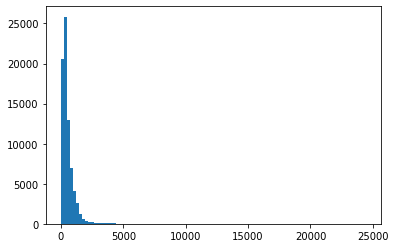

In [44]:
plt.hist([len(x1) for x1 in x], bins = 100)
plt.show()

In [45]:
max_len = 1000
x = pad_sequences(x, maxlen = max_len)

In [46]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [47]:
def weight_matrix1(model):
    weight_matrix = np.zeros((vocab_size, DIM))
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    
    return weight_matrix

In [48]:
embedding_vectors = weight_matrix1(w2v_model)

In [50]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim = DIM, weights = [embedding_vectors], input_length = max_len, trainable = False))
model.add(LSTM(units = 128))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         25863500  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 25,980,877
Trainable params: 117,377
Non-trainable params: 25,863,500
_________________________________________________________________


In [51]:
x = np.asarray(x).astype(np.float32)
y = np.asarray(y).astype(np.float32)
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [52]:
x_train.shape

(57360, 1000)

In [53]:
x_test.shape

(19120, 1000)

In [54]:
model.fit(x_train, y_train, validation_split = 0.3, epochs = 6)

Epoch 1/6
1255/1255 [==============================] - 114s 87ms/step - loss: 0.4086 - acc: 0.7982 - val_loss: 0.4488 - val_acc: 0.7746
Epoch 2/6
1255/1255 [==============================] - 108s 86ms/step - loss: 0.2856 - acc: 0.8726 - val_loss: 0.2580 - val_acc: 0.8781
Epoch 3/6
1255/1255 [==============================] - 108s 86ms/step - loss: 0.2128 - acc: 0.9063 - val_loss: 0.2286 - val_acc: 0.8926
Epoch 4/6
1255/1255 [==============================] - 108s 86ms/step - loss: 0.1852 - acc: 0.9184 - val_loss: 0.2201 - val_acc: 0.8990
Epoch 5/6
1255/1255 [==============================] - 108s 86ms/step - loss: 0.1576 - acc: 0.9320 - val_loss: 0.2239 - val_acc: 0.8982
Epoch 6/6
1255/1255 [==============================] - 108s 86ms/step - loss: 0.1421 - acc: 0.9391 - val_loss: 0.2252 - val_acc: 0.9004


In [63]:
y_pred = (model.predict(x_test) >= 0.5).astype(int)
accuracy_score(y_test, y_pred)

598/598 [==============================] - 16s 27ms/step


0.895397489539749

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      9896
         1.0       0.89      0.89      0.89      9224

    accuracy                           0.90     19120
   macro avg       0.90      0.90      0.90     19120
weighted avg       0.90      0.90      0.90     19120



In [73]:
import joblib
# Save the model as a pickle in a file 
joblib.dump(model, '/notebooks/model.pkl')  

INFO:tensorflow:Assets written to: ram://ecf3b2f8-be7c-4930-aeb2-de7c18c8c1a5/assets


INFO:tensorflow:Assets written to: ram://ecf3b2f8-be7c-4930-aeb2-de7c18c8c1a5/assets


['/notebooks/model.pkl']